In [510]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:14 http://ppa.launchpad.net/graph

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


In [511]:
import time
 
from bs4 import BeautifulSoup
 
#driver = webdriver.Chrome()
driver.implicitly_wait(30)

In [512]:
import requests
import pandas as pd
from datetime import datetime
import ast
import time

In [513]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36"}

In [514]:
try:
    SCROLL_PAUSE_TIME = 3.5
    driver.get("https://www.kathimerini.gr/search/covid19/")
 
 
    last_height = driver.execute_script("return document.body.scrollHeight")
 
    while (last_height < 42000):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(SCROLL_PAUSE_TIME)
        new_height = driver.execute_script("return document.body.scrollHeight")
        print('height:', new_height)
        if new_height == last_height:
            print('height =' , new_height)
            break
        last_height = new_height
 
 
 
finally:
#    driver.quit()
    print("OK")

height: 6370
height = 6370
OK


In [515]:
html = driver.page_source.encode('utf-8')
 
soup = BeautifulSoup(html, "html.parser")

In [516]:
response = requests.get("https://www.kathimerini.gr/search/covid19/", headers=headers)
 
doc = BeautifulSoup(response.text)

In [517]:
from selenium import webdriver
import time
 
url = "https://www.kathimerini.gr/search/covid19/"
 
 
driver.get(url)
html = driver.page_source.encode('utf-8')
page_num = 0
 
driver.find_element_by_css_selector('.css-17ovhjm.css-17ovhjm .qc-cmp2-footer .qc-cmp2-summary-buttons button:last-child').click()
 
 
while driver.find_elements_by_css_selector('.nx_loadmore'):
    driver.find_element_by_css_selector('.nx_loadmore').click()
    page_num += 1
    print("getting page number "+str(page_num))
    time.sleep(1)
 
html = driver.page_source.encode('utf-8')
doc = BeautifulSoup(html, "html.parser")

getting page number 1
getting page number 2


In [518]:
# Ξεκινάμε με μια άδεια λίστα
from datetime import datetime
import re as re
stories_list = []
stories = doc.find_all('article')
for story in stories:
    headline = story.find('h2')
    summary = story.find('p')
    link = story.a['href']
    releasedate = story.find('span', { 'class' : 'meta-date' })
    # Έχει η ιστορία summary?
    if summary:
        summary_text = summary.text
    else:
        summary_text = ''
        
        # Φτιάξε ένα λεξικό αν ΕΧΕΙ summary
    story_dict = {
            'headline': headline.text,
            'summary': summary_text,
            'link': link,
            'releasedate': releasedate.text
        }
     
    # Πρόσθεσε το λέξικο στη λίστα
    stories_list.append(story_dict)
 
print(stories_list)
 
# Τώρα που τελειώσαμε μετέτρεψε το σε CSV και αποθήκευσε το.
# Αν δεν χρησιμοποιήσετε το index=False, θα έχετε ένα άσχημο dataframe!
import pandas as pd
kathimerini = pd.DataFrame(stories_list)
 
kathimerini['releasedate'] = pd.to_datetime(kathimerini['releasedate'], format='%d.%m.%Y / %H:%M')
 
kathimerini.to_csv("kathimerini.csv", index=False)

[{'headline': 'Βέλγιο: Θετική εισήγηση για τον εμβολιασμό κατά της covid19 των εφήβων 12-15 ετών', 'summary': 'Θετική εισήγηση για τον εμβολιασμό κατά της covid-19 των εφήβων 12-15 ετών, έδωσε το Ανώτατο Συμβούλιο Υγείας του Βελγίου, προτείνοντας ωστόσο τον εμβολιασμό μόνο των ευπαθών εφήβων ή όσων βρίσκονται κοντά σε άτομα που είναι ευάλωτα.', 'link': 'https://www.kathimerini.gr/world/561423979/velgio-thetiki-eisigisi-gia-ton-emvoliasmo-kata-tis-covid19-ton-efivon-12-15-eton/', 'releasedate': '06.07.2021 / 15:31'}, {'headline': 'Εμβολιασμός-COVID19: Το κουβανικό Αμπντάλα 92,98% αποτελεσματικό έπειτα από 3 δόσεις', 'summary': 'Το Αμπντάλα, το ένα από τα υποψήφια εμβόλια κατά της COVID-19 που κατασκευάζονται στην Κούβα –και ένα από τα πρώτα που αναπτύχθηκαν στη Λατινική Αμερική–, έχει αποτελεσματικότητα 92,28% έναντι της νόσου, ανακοίνωσε χθες Δευτέρα το εργαστήριο που το δημιούργησε. ', 'link': 'https://www.kathimerini.gr/world/561406834/emvoliasmos-covid19-to-koyvaniko-ampntala-92-98-

In [519]:
kathimerini

headline  ...         releasedate
0   Βέλγιο: Θετική εισήγηση για τον εμβολιασμό κατ...  ... 2021-07-06 15:31:00
1   Εμβολιασμός-COVID19: Το κουβανικό Αμπντάλα 92,...  ... 2021-06-22 07:49:00
2   Ψηφιακό πιστοποιητικό Covid19: Αναλυτικός οδηγ...  ... 2021-05-28 21:54:00
3   Ψηφιακό πιστοποιητικό Covid19: Η διαδικασία έκ...  ... 2021-05-28 12:25:00
4   Βασίλης Σεβαστής: Πέθανε από COVID19 ο παλαιός...  ... 2021-04-08 17:05:00
5   Εφαρμογή με ελληνικές ρίζες στη μάχη κατά της ...  ... 2021-01-27 10:49:00
6   Λέρος: Ξέχασαν στο πλοίο δείγματα για Covid19 ...  ... 2020-11-02 17:21:00
7   Στο «κόκκινο» η Ευρώπη- Ξεπέρασε σε νέα κρούσμ...  ... 2020-10-14 16:04:00
8   Ευρώπη- Covid19: Στο «στόχαστρο» και πάλι οι μ...  ... 2020-10-06 15:32:00
9   Το αποτύπωμα του Covid19 στις εισηγμένες του Χ.Α.  ... 2020-10-01 13:03:00
10  Covid19: Το χρονικό της μάχης του πλανήτη κατά...  ... 2020-09-30 11:25:00
11  Lenovo- Focus Bari: Οι ελληνικές επιχειρήσεις ...  ... 2020-09-24 19:46:00
12  O Covid19 στέλνει τους επενδυτές στο καταφύγιο...  ... 2020-09-24 11:56:00
13  Εργασία: Πόσες ώρες «έφαγε» ο Covid19 το β’ τρ...  ... 2020-09-18 13:31:00
14  OHE: Το πρόγραμμα του ΠΟΥ για τον Covid19 χρει...  ... 2020-09-10 15:13:00
15  Covid19: Γιατί ο εθνικισμός του εμβολίου κερδί...  ... 2020-09-10 11:12:00
16      Ο Covid19 και ο κίνδυνος επισιτιστικής κρίσης  ... 2020-09-09 12:33:00
17  Covid19: Γιατί το εμβόλιο δεν είναι «πανάκεια»...  ... 2020-09-09 09:29:00
18  ΗΠΑ – Covid19: Η Φλόριντα ξεπέρασε σε κρούσματ...  ... 2020-07-26 19:22:00
19  Θ. Δημόπουλος-COVID19: Για κάθε μέρα σε μηχανι...  ... 2020-07-12 13:34:00
20  «East Med: Η τριμερής συνεργασία (Ελλάδα-Ισραή...  ... 2020-06-02 13:38:00
21  Προς ένα μετά-COVID19 νέο αναπτυξιακό μοντέλο:...  ... 2020-05-19 13:07:00
22  «Digital Clinic» και «COVID19 Digital Clinic»:...  ... 2020-05-12 11:11:00

[23 rows x 4 columns]

In [520]:
 kathimerini['fulltext']=0
for ind in kathimerini.index:
     #print(kathimerini['link'][ind])
     urln = requests.get(kathimerini['link'][ind])
     docstory = BeautifulSoup(urln.text) 
     artstory = docstory.findAll('p')
     full_text = ''
     for p in artstory:
      text = p.text.replace(',', '').replace('"', '').replace('.', '').replace("'", "").replace('?', '').replace("\n", "").replace('\r', '')
      full_text += text
     kathimerini['fulltext'][ind]=full_text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [521]:
kathimerini

headline  ...                                           fulltext
0   Βέλγιο: Θετική εισήγηση για τον εμβολιασμό κατ...  ...  Θετική εισήγηση για τον εμβολιασμό κατά της co...
1   Εμβολιασμός-COVID19: Το κουβανικό Αμπντάλα 92,...  ...  Το Αμπντάλα το ένα από τα υποψήφια εμβόλια κατ...
2   Ψηφιακό πιστοποιητικό Covid19: Αναλυτικός οδηγ...  ...  Ένα σημαντικό βήμα για τη σταδιακή μετάβαση στ...
3   Ψηφιακό πιστοποιητικό Covid19: Η διαδικασία έκ...  ...  Πώς ακριβώς λειτουργεί το ευρωπαϊκό «Ψηφιακό Π...
4   Βασίλης Σεβαστής: Πέθανε από COVID19 ο παλαιός...  ...  Ο Βασίλης Σεβαστής δεν κατάφερε να βγει νικητή...
5   Εφαρμογή με ελληνικές ρίζες στη μάχη κατά της ...  ...  Στα 17 του χρόνια ο Θεσσαλονικιός Γιώργος Χατζ...
6   Λέρος: Ξέχασαν στο πλοίο δείγματα για Covid19 ...  ...  Η ένωση γιατρών του κρατικού θεραπευτηρίου νοσ...
7   Στο «κόκκινο» η Ευρώπη- Ξεπέρασε σε νέα κρούσμ...  ...  Η μάχη της Ευρώπης να θέσει υπό έλεγχο το δεύτ...
8   Ευρώπη- Covid19: Στο «στόχαστρο» και πάλι οι μ...  ...  To δεύτερο κύμα της πανδημίας του νέου κορωνοϊ...
9   Το αποτύπωμα του Covid19 στις εισηγμένες του Χ.Α.  ...  Η εμφάνιση του Covid19 και τα αναγκαία για τον...
10  Covid19: Το χρονικό της μάχης του πλανήτη κατά...  ...  Από την πρώτη του εμφάνιση σε μία υπαίθρια αγο...
11  Lenovo- Focus Bari: Οι ελληνικές επιχειρήσεις ...  ...  Η πανδημία του Covid19 έφερε ανατροπές στην κα...
12  O Covid19 στέλνει τους επενδυτές στο καταφύγιο...  ...  Οι εντεινόμενες ανησυχίες για τις οικονομικές ...
13  Εργασία: Πόσες ώρες «έφαγε» ο Covid19 το β’ τρ...  ...  Στροφή στην τηλεργασία όπου αυτό ήταν εφικτό α...
14  OHE: Το πρόγραμμα του ΠΟΥ για τον Covid19 χρει...  ...  Την ανάγκη να χορηγηθούν επιπλέον 35 δισ δολάρ...
15  Covid19: Γιατί ο εθνικισμός του εμβολίου κερδί...  ...  Από την πρώτη στιγμή που ο ΠΟΥ κήρυξε παγκόσμι...
16      Ο Covid19 και ο κίνδυνος επισιτιστικής κρίσης  ...  Την ώρα που οι οικονομίες βυθίζονται στην ύφεσ...
17  Covid19: Γιατί το εμβόλιο δεν είναι «πανάκεια»...  ...  Η αναστολή των δοκιμών του εμβολίου από την As...
18  ΗΠΑ – Covid19: Η Φλόριντα ξεπέρασε σε κρούσματ...  ...  Η Φλόριντα έγινε σήμερα η δεύτερη πολιτεία μετ...
19  Θ. Δημόπουλος-COVID19: Για κάθε μέρα σε μηχανι...  ...  Δυσχερή χαρακτηρίζει προς το παρόν την εκτίμησ...
20  «East Med: Η τριμερής συνεργασία (Ελλάδα-Ισραή...  ...  Tο Ελληνο-Αμερικανικό Εμπορικό Επιμελητήριο στ...
21  Προς ένα μετά-COVID19 νέο αναπτυξιακό μοντέλο:...  ...  Το ανθρώπινο είδος είναι εγγενώς συνδεδεμένο μ...
22  «Digital Clinic» και «COVID19 Digital Clinic»:...  ...  To Hellenic Healthcare Group ο μεγαλύτερος ιδι...

[23 rows x 5 columns]

In [522]:
kathimerini['releasedate'] = pd.to_datetime(kathimerini['releasedate'], format='%a %b %d %H:%M:%S +0000 %Y')

In [523]:
kathimerini['fulltext'] = kathimerini['fulltext'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

In [524]:
kathimerini['year'] = pd.DatetimeIndex(kathimerini['releasedate']).year
kathimerini['month'] = pd.DatetimeIndex(kathimerini['releasedate']).month
kathimerini['day'] = pd.DatetimeIndex(kathimerini['releasedate']).day

Διαγράμματα χρονικής συσχέτισης

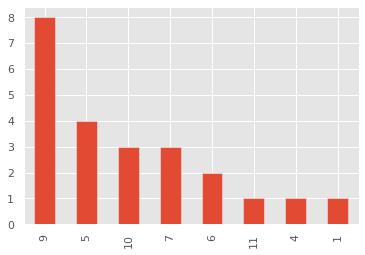

In [525]:
kathimerini['month'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


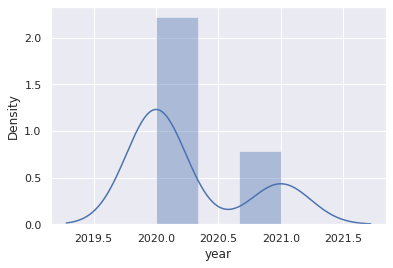

In [526]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()


sns.distplot(kathimerini['year'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


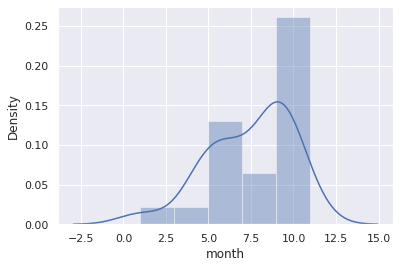

In [527]:
sns.distplot(kathimerini['month'])

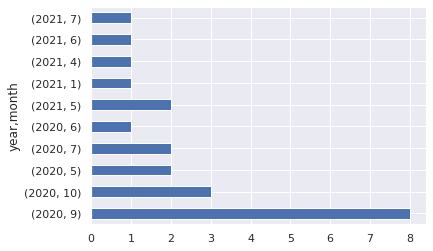

In [528]:
kathimerini.groupby('year')["month"].value_counts().groupby(level=0).head(5).plot(kind='barh')

In [529]:
import matplotlib.pyplot as plt

In [530]:
kathimerini.to_csv("kathimerini.csv", index=False)

In [531]:
kathimerini.to_excel('kathimerini.xls', index=False)

Heatmap

In [532]:
data_url = 'kathimerini.csv'
gapminder = pd.read_csv(data_url)
print(gapminder.head(6))

                                            headline  ... day
0  Βέλγιο: Θετική εισήγηση για τον εμβολιασμό κατ...  ...   6
1  Εμβολιασμός-COVID19: Το κουβανικό Αμπντάλα 92,...  ...  22
2  Ψηφιακό πιστοποιητικό Covid19: Αναλυτικός οδηγ...  ...  28
3  Ψηφιακό πιστοποιητικό Covid19: Η διαδικασία έκ...  ...  28
4  Βασίλης Σεβαστής: Πέθανε από COVID19 ο παλαιός...  ...   8
5  Εφαρμογή με ελληνικές ρίζες στη μάχη κατά της ...  ...  27

[6 rows x 8 columns]


In [533]:
df1 = gapminder[['year', 'month', 'day']]
print(df1.head(3))

   year  month  day
0  2021      7    6
1  2021      6   22
2  2021      5   28


In [534]:
heatmap1_data = pd.pivot_table(df1, values='year', 
                     index=['day'], 
                     columns='month')

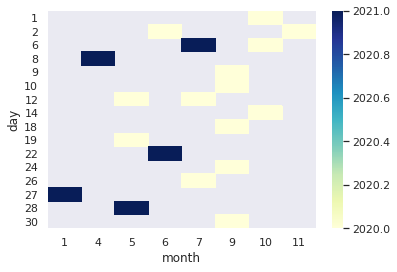

In [535]:
sns.heatmap(heatmap1_data, cmap="YlGnBu")

In [536]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [537]:
def load_kathimerini():
    return pd.read_csv("kathimerini.csv", delimiter="\t")

data = load_kathimerini()
kathimerini = kathimerini["fulltext"]
print(kathimerini)

0     Θετική εισήγηση για τον εμβολιασμό κατά της co...
1     Το Αμπντάλα το ένα από τα υποψήφια εμβόλια κατ...
2     Ένα σημαντικό βήμα για τη σταδιακή μετάβαση στ...
3     Πώς ακριβώς λειτουργεί το ευρωπαϊκό «Ψηφιακό Π...
4     Ο Βασίλης Σεβαστής δεν κατάφερε να βγει νικητή...
5     Στα 17 του χρόνια ο Θεσσαλονικιός Γιώργος Χατζ...
6     Η ένωση γιατρών του κρατικού θεραπευτηρίου νοσ...
7     Η μάχη της Ευρώπης να θέσει υπό έλεγχο το δεύτ...
8     To δεύτερο κύμα της πανδημίας του νέου κορωνοϊ...
9     Η εμφάνιση του Covid19 και τα αναγκαία για τον...
10    Από την πρώτη του εμφάνιση σε μία υπαίθρια αγο...
11    Η πανδημία του Covid19 έφερε ανατροπές στην κα...
12    Οι εντεινόμενες ανησυχίες για τις οικονομικές ...
13    Στροφή στην τηλεργασία όπου αυτό ήταν εφικτό α...
14    Την ανάγκη να χορηγηθούν επιπλέον 35 δισ δολάρ...
15    Από την πρώτη στιγμή που ο ΠΟΥ κήρυξε παγκόσμι...
16    Την ώρα που οι οικονομίες βυθίζονται στην ύφεσ...
17    Η αναστολή των δοκιμών του εμβολίου από τη

In [538]:
kathimerini_lower = list(map(lambda x:x.lower(),kathimerini))
print (kathimerini_lower)

['θετική εισήγηση για τον εμβολιασμό κατά της covid-19 των εφήβων 12-15 ετών έδωσε το ανώτατο συμβούλιο υγείας του βελγίου προτείνοντας ωστόσο τον εμβολιασμό μόνο των ευπαθών εφήβων ή όσων βρίσκονται κοντά σε άτομα που είναι ευάλωταόπως αναφέρει σημερινό πρωτοσέλιδο δημοσίευμα της γαλλόφωνης εφημερίδας «le soir» το βέλγιο επιμένει στη «συντονισμένη ελεύθερη επιλογή» όσον αφορά τον εμβολιασμό των εφήβων και σε αντίθεση με άλλες χώρες όπως η γαλλία ή το ισραήλ το βέλγιο δεν θα πρέπει να εμβολιάζει συστηματικά όλους τους εφήβους ηλικίας 12-15 ετών\xa0το ανώτατο συμβούλιο υγείας (css) που θα υποβάλλει τη γνωμοδότησή του σήμερα το απόγευμα στις αρμόδιες αρχές επισημαίνει τις συγκεκριμένες καταστάσεις στις οποίες μπορεί να συνιστάται ο εμβολιασμός των νέων εφήβων είτε είναι παιδιά με συν-νοσογόνους παράγοντες (λευχαιμία χρόνιες παθήσεις των νεφρών ή του ήπατος σύνδρομο down κλπ) επίσης η έμμεση προστασία πιο ευάλωτων συγγενών (παππούδες γονείς αδέλφια και αδελφές με συννοσηρότητα ή ανοσοκατε

In [539]:
import re

kathimerini_as_string = ''.join(kathimerini_lower)

rt_regex = re.sub('rt @', " ", kathimerini_as_string)
rt_regex

'θετική εισήγηση για τον εμβολιασμό κατά της covid-19 των εφήβων 12-15 ετών έδωσε το ανώτατο συμβούλιο υγείας του βελγίου προτείνοντας ωστόσο τον εμβολιασμό μόνο των ευπαθών εφήβων ή όσων βρίσκονται κοντά σε άτομα που είναι ευάλωταόπως αναφέρει σημερινό πρωτοσέλιδο δημοσίευμα της γαλλόφωνης εφημερίδας «le soir» το βέλγιο επιμένει στη «συντονισμένη ελεύθερη επιλογή» όσον αφορά τον εμβολιασμό των εφήβων και σε αντίθεση με άλλες χώρες όπως η γαλλία ή το ισραήλ το βέλγιο δεν θα πρέπει να εμβολιάζει συστηματικά όλους τους εφήβους ηλικίας 12-15 ετών\xa0το ανώτατο συμβούλιο υγείας (css) που θα υποβάλλει τη γνωμοδότησή του σήμερα το απόγευμα στις αρμόδιες αρχές επισημαίνει τις συγκεκριμένες καταστάσεις στις οποίες μπορεί να συνιστάται ο εμβολιασμός των νέων εφήβων είτε είναι παιδιά με συν-νοσογόνους παράγοντες (λευχαιμία χρόνιες παθήσεις των νεφρών ή του ήπατος σύνδρομο down κλπ) επίσης η έμμεση προστασία πιο ευάλωτων συγγενών (παππούδες γονείς αδέλφια και αδελφές με συννοσηρότητα ή ανοσοκατεσ

In [540]:
usernames_regex = re.sub(r"@[^ \.]+", " ", rt_regex)
usernames_regex


'θετική εισήγηση για τον εμβολιασμό κατά της covid-19 των εφήβων 12-15 ετών έδωσε το ανώτατο συμβούλιο υγείας του βελγίου προτείνοντας ωστόσο τον εμβολιασμό μόνο των ευπαθών εφήβων ή όσων βρίσκονται κοντά σε άτομα που είναι ευάλωταόπως αναφέρει σημερινό πρωτοσέλιδο δημοσίευμα της γαλλόφωνης εφημερίδας «le soir» το βέλγιο επιμένει στη «συντονισμένη ελεύθερη επιλογή» όσον αφορά τον εμβολιασμό των εφήβων και σε αντίθεση με άλλες χώρες όπως η γαλλία ή το ισραήλ το βέλγιο δεν θα πρέπει να εμβολιάζει συστηματικά όλους τους εφήβους ηλικίας 12-15 ετών\xa0το ανώτατο συμβούλιο υγείας (css) που θα υποβάλλει τη γνωμοδότησή του σήμερα το απόγευμα στις αρμόδιες αρχές επισημαίνει τις συγκεκριμένες καταστάσεις στις οποίες μπορεί να συνιστάται ο εμβολιασμός των νέων εφήβων είτε είναι παιδιά με συν-νοσογόνους παράγοντες (λευχαιμία χρόνιες παθήσεις των νεφρών ή του ήπατος σύνδρομο down κλπ) επίσης η έμμεση προστασία πιο ευάλωτων συγγενών (παππούδες γονείς αδέλφια και αδελφές με συννοσηρότητα ή ανοσοκατεσ

In [541]:
#diagrafi hashtags
hashtags_regex = re.sub(r"#[^ \.]+"," ",usernames_regex)
hashtags_regex


'θετική εισήγηση για τον εμβολιασμό κατά της covid-19 των εφήβων 12-15 ετών έδωσε το ανώτατο συμβούλιο υγείας του βελγίου προτείνοντας ωστόσο τον εμβολιασμό μόνο των ευπαθών εφήβων ή όσων βρίσκονται κοντά σε άτομα που είναι ευάλωταόπως αναφέρει σημερινό πρωτοσέλιδο δημοσίευμα της γαλλόφωνης εφημερίδας «le soir» το βέλγιο επιμένει στη «συντονισμένη ελεύθερη επιλογή» όσον αφορά τον εμβολιασμό των εφήβων και σε αντίθεση με άλλες χώρες όπως η γαλλία ή το ισραήλ το βέλγιο δεν θα πρέπει να εμβολιάζει συστηματικά όλους τους εφήβους ηλικίας 12-15 ετών\xa0το ανώτατο συμβούλιο υγείας (css) που θα υποβάλλει τη γνωμοδότησή του σήμερα το απόγευμα στις αρμόδιες αρχές επισημαίνει τις συγκεκριμένες καταστάσεις στις οποίες μπορεί να συνιστάται ο εμβολιασμός των νέων εφήβων είτε είναι παιδιά με συν-νοσογόνους παράγοντες (λευχαιμία χρόνιες παθήσεις των νεφρών ή του ήπατος σύνδρομο down κλπ) επίσης η έμμεση προστασία πιο ευάλωτων συγγενών (παππούδες γονείς αδέλφια και αδελφές με συννοσηρότητα ή ανοσοκατεσ

In [542]:
#diagrafi links
links_regex = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", hashtags_regex)
links_regex

'θετική εισήγηση για τον εμβολιασμό κατά της covid-19 των εφήβων 12-15 ετών έδωσε το ανώτατο συμβούλιο υγείας του βελγίου προτείνοντας ωστόσο τον εμβολιασμό μόνο των ευπαθών εφήβων ή όσων βρίσκονται κοντά σε άτομα που είναι ευάλωταόπως αναφέρει σημερινό πρωτοσέλιδο δημοσίευμα της γαλλόφωνης εφημερίδας «le soir» το βέλγιο επιμένει στη «συντονισμένη ελεύθερη επιλογή» όσον αφορά τον εμβολιασμό των εφήβων και σε αντίθεση με άλλες χώρες όπως η γαλλία ή το ισραήλ το βέλγιο δεν θα πρέπει να εμβολιάζει συστηματικά όλους τους εφήβους ηλικίας 12-15 ετών\xa0το ανώτατο συμβούλιο υγείας (css) που θα υποβάλλει τη γνωμοδότησή του σήμερα το απόγευμα στις αρμόδιες αρχές επισημαίνει τις συγκεκριμένες καταστάσεις στις οποίες μπορεί να συνιστάται ο εμβολιασμός των νέων εφήβων είτε είναι παιδιά με συν-νοσογόνους παράγοντες (λευχαιμία χρόνιες παθήσεις των νεφρών ή του ήπατος σύνδρομο down κλπ) επίσης η έμμεση προστασία πιο ευάλωτων συγγενών (παππούδες γονείς αδέλφια και αδελφές με συννοσηρότητα ή ανοσοκατεσ

In [543]:
# diagrafi\n\n 

new_lines_regex = re.sub('\n\n', " ", links_regex)
new_lines_regex

'θετική εισήγηση για τον εμβολιασμό κατά της covid-19 των εφήβων 12-15 ετών έδωσε το ανώτατο συμβούλιο υγείας του βελγίου προτείνοντας ωστόσο τον εμβολιασμό μόνο των ευπαθών εφήβων ή όσων βρίσκονται κοντά σε άτομα που είναι ευάλωταόπως αναφέρει σημερινό πρωτοσέλιδο δημοσίευμα της γαλλόφωνης εφημερίδας «le soir» το βέλγιο επιμένει στη «συντονισμένη ελεύθερη επιλογή» όσον αφορά τον εμβολιασμό των εφήβων και σε αντίθεση με άλλες χώρες όπως η γαλλία ή το ισραήλ το βέλγιο δεν θα πρέπει να εμβολιάζει συστηματικά όλους τους εφήβους ηλικίας 12-15 ετών\xa0το ανώτατο συμβούλιο υγείας (css) που θα υποβάλλει τη γνωμοδότησή του σήμερα το απόγευμα στις αρμόδιες αρχές επισημαίνει τις συγκεκριμένες καταστάσεις στις οποίες μπορεί να συνιστάται ο εμβολιασμός των νέων εφήβων είτε είναι παιδιά με συν-νοσογόνους παράγοντες (λευχαιμία χρόνιες παθήσεις των νεφρών ή του ήπατος σύνδρομο down κλπ) επίσης η έμμεση προστασία πιο ευάλωτων συγγενών (παππούδες γονείς αδέλφια και αδελφές με συννοσηρότητα ή ανοσοκατεσ

In [544]:
# diagrafi &amp;

amp_regex = re.sub('&amp;', " ", new_lines_regex)
amp_regex

'θετική εισήγηση για τον εμβολιασμό κατά της covid-19 των εφήβων 12-15 ετών έδωσε το ανώτατο συμβούλιο υγείας του βελγίου προτείνοντας ωστόσο τον εμβολιασμό μόνο των ευπαθών εφήβων ή όσων βρίσκονται κοντά σε άτομα που είναι ευάλωταόπως αναφέρει σημερινό πρωτοσέλιδο δημοσίευμα της γαλλόφωνης εφημερίδας «le soir» το βέλγιο επιμένει στη «συντονισμένη ελεύθερη επιλογή» όσον αφορά τον εμβολιασμό των εφήβων και σε αντίθεση με άλλες χώρες όπως η γαλλία ή το ισραήλ το βέλγιο δεν θα πρέπει να εμβολιάζει συστηματικά όλους τους εφήβους ηλικίας 12-15 ετών\xa0το ανώτατο συμβούλιο υγείας (css) που θα υποβάλλει τη γνωμοδότησή του σήμερα το απόγευμα στις αρμόδιες αρχές επισημαίνει τις συγκεκριμένες καταστάσεις στις οποίες μπορεί να συνιστάται ο εμβολιασμός των νέων εφήβων είτε είναι παιδιά με συν-νοσογόνους παράγοντες (λευχαιμία χρόνιες παθήσεις των νεφρών ή του ήπατος σύνδρομο down κλπ) επίσης η έμμεση προστασία πιο ευάλωτων συγγενών (παππούδες γονείς αδέλφια και αδελφές με συννοσηρότητα ή ανοσοκατεσ

In [545]:
#Wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [546]:
list(STOPWORDS)[0:20]

["i'll",
 'each',
 "that's",
 'being',
 'were',
 'from',
 "i've",
 'theirs',
 'such',
 'into',
 'we',
 'than',
 'doing',
 'on',
 "they'll",
 "don't",
 'k',
 'most',
 'themselves',
 "what's"]

In [547]:
import spacy

In [548]:
!python -m spacy download el_core_news_sm
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [549]:
nlp = spacy.load("el_core_news_sm")

In [550]:
nlp_en=spacy.load('en_core_web_sm')

In [551]:
from spacy.lang.en.stop_words import STOP_WORDS
english_stopwords=list(STOP_WORDS)

print(english_stopwords)

['keep', 'across', 'doing', 'three', 'most', '’re', 'in', 'me', 'made', 'whereas', 'full', 'two', 'thereupon', 'hundred', 'am', '’d', 'n’t', 'same', 'as', 'beside', 'her', 'put', 'so', 'anyone', 'at', 'us', 'side', 'toward', 'over', 'does', 'might', 'out', 'fifteen', 'done', 'yourselves', 'enough', 'six', 'front', 'thus', 'top', 'while', 'therefore', 'thru', 'along', 'when', 'get', 'i', 'towards', 'seem', 'seems', 'yet', 'within', 'again', 'above', 'became', 'twenty', 'former', 'using', 'behind', 'your', 'amount', 'since', 'around', 'wherein', 'with', 'nothing', '’m', 'be', 'then', 'call', 'amongst', 'several', 'being', 'another', 'into', 'much', 'we', 'next', 'already', 'therein', 'everyone', 'how', 'give', 'must', 'its', 'hereupon', 'take', "n't", 'five', 'beyond', 'perhaps', "'ll", 'under', 'whole', 'himself', 'back', 'them', '’ve', 'due', 'hereafter', 'off', 'myself', 'bottom', 'through', 'seeming', 'twelve', 'whenever', 'nowhere', 'whether', 'somewhere', 'still', 'see', 'itself', 

In [552]:
list(nlp.Defaults.stop_words)[0:1500]

['πίσω',
 'ετέρα',
 'έτερον',
 'τούτου',
 'προτού',
 'άλλα',
 'στον',
 'καμίαν',
 'ούτε',
 'σας',
 'τις',
 'τώρα',
 'ετούτες',
 'κάμποσα',
 'τρεις',
 'όλη',
 'είτε',
 'έχοντας',
 'είσαι',
 'ι',
 'όσο',
 'κάποιον',
 'τέτοιες',
 'ειδεμή',
 'κανέναν',
 'κάτι',
 'τέτοιαν',
 'είμαι',
 'τέτοιο',
 'πόσους',
 'ως',
 'κάποιοι',
 'αφού',
 'μόνες',
 'αντί',
 'ολόγυρα',
 'μάλλον',
 'ίδιαν',
 'άλλοι',
 'έκαστοι',
 'κάμποσου',
 'αυτές',
 'όλος',
 'ναι',
 'μεν',
 'οποιοσδήποτε',
 'γιατί',
 'μέχρι',
 'δικά',
 'πέρσι',
 'όχι',
 'σε',
 'του',
 'συχνή',
 'ήσασταν',
 'όσος',
 'οποιανδήποτε',
 'είθε',
 'έχω',
 'οσοδήποτε',
 'ο',
 'ίσια',
 'αυτής',
 'πάρα',
 'να',
 'ετούτο',
 'μήτε',
 'ίδιους',
 'συχνοί',
 'σου',
 'αυτών',
 'εμένα',
 'ετούτης',
 'άλλοτε',
 'αντίς',
 'πολλά',
 'πάντοτε',
 'κάποιος',
 'στην',
 'έκαστης',
 'έτεροι',
 'μακάρι',
 'πρόκειται',
 'τέτοιου',
 'εμείς',
 'τοι',
 'εαυτόν',
 'αν',
 'όποιος',
 'εφεξής',
 'κάμποσων',
 'οποιοδηήποτε',
 'είχα',
 'εκάστων',
 'συγχρόνως',
 'μακρυά',
 'εσύ',
 

In [553]:
def remove_punctuation(text):
	dict = {
			u"'": "",
      u"&": "",
      u"(": "",
      u")": "",
      u"2": "",
			"'": "",
			u",": "",
			",": "",
			u".": "",
			".": "",
			u"``": "",
			"``": "",
			u"''": "",
			"''": "",
			u'"': "",
			'"': "",
			u"[":"",
			"[":"",
			u"]":"",
			"]":"",
			u">": "",
			">": "",
			u"<": "",
			"<": "",
			u";": "",
			";": "",
			u"·": "",
			'·': "",
			u"‘": "",
			"‘": "",
			u"’": "",
			"’": "",
			"–": "",
			u"–": "",
      "και":"",
      ":":"",
      "!":"",
      u";":"",
      "»":"",
      "«":"",
      "%":"",
      " ή ":"",
      " κ ":"",
      " συμπληρώστε ":"",
      " λαμβάνετε ":"",
      " επιθυμείτε ":"",
      " email ":"",
      " newsletter ":"",
      " εκδόσεισμονοπροσωπηαε ":"",
      " 2021poweredby ":"",
      " 2021poweredbyσυμπληρωστε": "",
      " παρακαλούμε ":"",
      " υγείας ":"",
      " ενημερωτικά ":"",
      " wwwkathimerinigr ":"",
      " τν ":"",
      " στν ":"",
      " wwwkathimerinigrγια ": "",
      " λαμβάνωμνύματα ": "",
      " εκδόσεις ": "",
      " τς ":"",
      " παρακαλούμετoσαςemail ": "",
      " προσωπικών ": "",
      " δεδομένων ": "",
      " τοναnewsletter ": "",
      " αννατοτουεπιλέξτεπρώτα ": "",
      " παρακαλούμετοσαςemail ": "",
      " παρακάτω ": "",
      " πατώντας ": "",
      " κουμπί ": "",
      " τουακολουθώντας ": "",
      " επιλέξτε ": "",
      " διαγραφείτε ": "",
      " λαμβάνω ": "",
      " λαμβάνω ": "",
      " παρακαλούμε ": "",
      " λαμβάνω ": "",
      " ολοκληρώστε ": "",
      " λαμβάνω ": "",
      " διαγραφείτε ": "",
      " διαχειριστή ": "",
      " μονοπροσωπη ": "",
      " το ": "",
      " πεδίο ": "",
      " παρακαλούμε ": "",
      " email ": "",
      " επιλέξτε ": "",
      " πρώτα ": "",
      " www ": "",
      " kathimerini ": "",
      " gr ": "",
      " εκδόσεισ ": "",

			}
	regex = re.compile("(%s)" % "|".join(map(re.escape, dict.keys())))
	return regex.sub(lambda mo: dict[mo.string[mo.start():mo.end()]], text)


In [554]:
final_text=remove_punctuation(amp_regex)

In [555]:
gr_stopwords=list(nlp.Defaults.stop_words)
final_stopwords=gr_stopwords+ english_stopwords

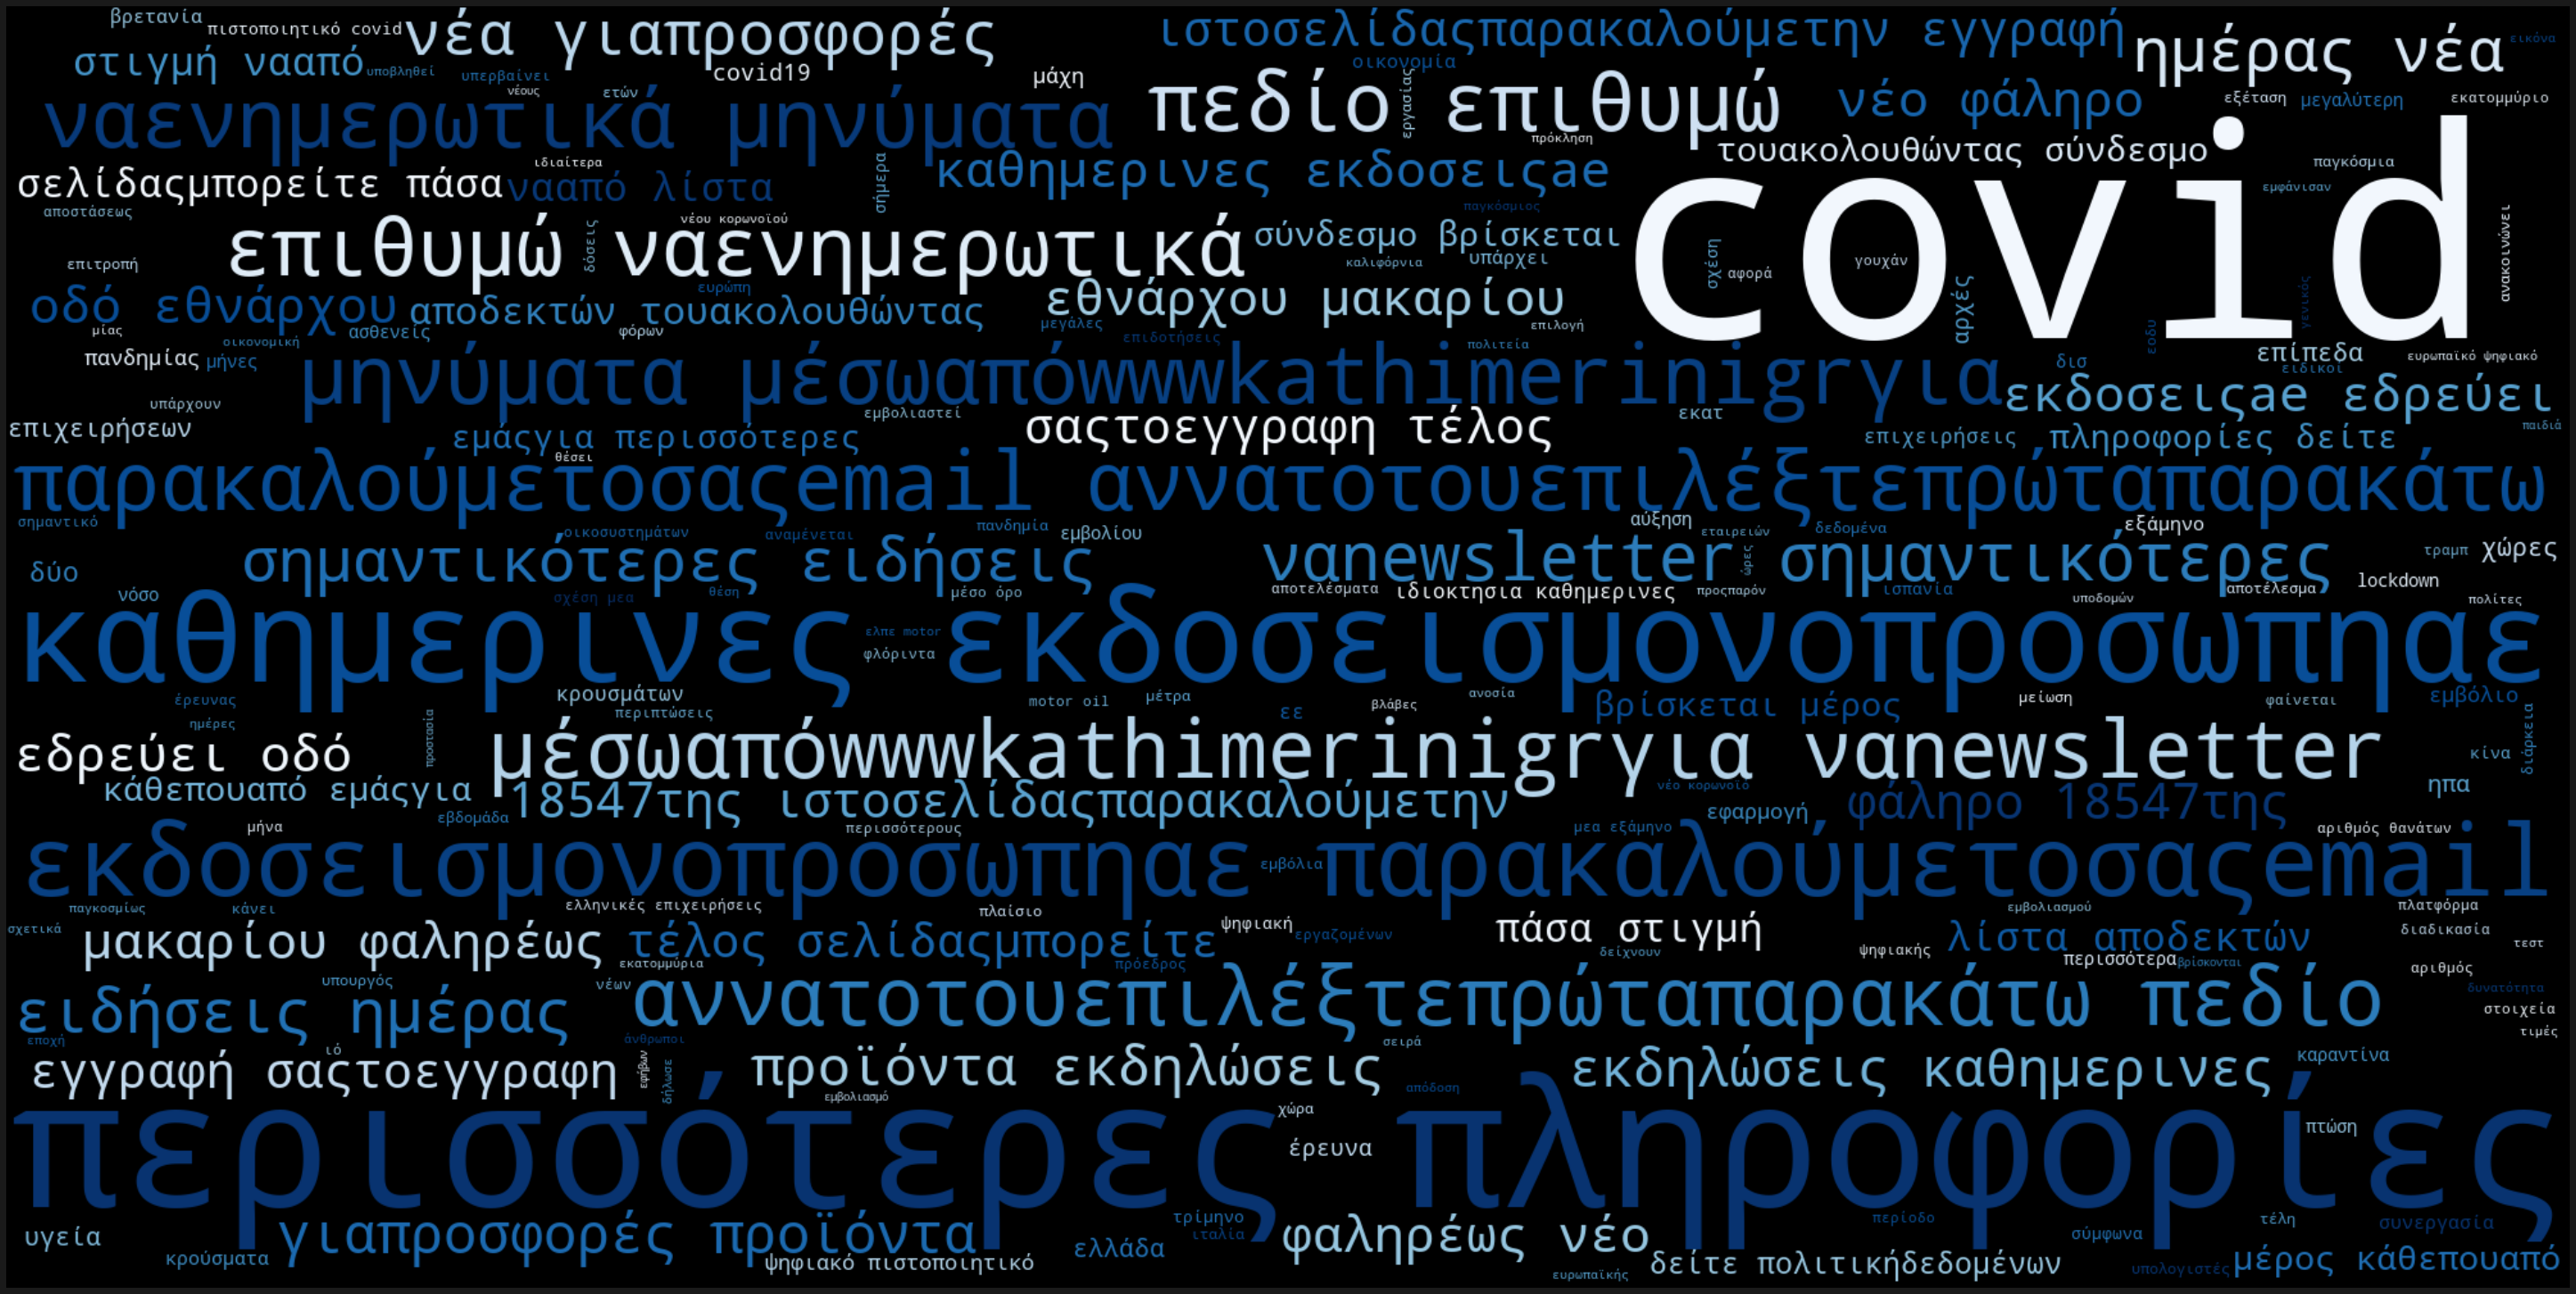

In [556]:
wordcloud = WordCloud(
    stopwords = final_stopwords,
    width = 2000,
    height = 1000,
    background_color = 'black',
    colormap="Blues"
 ).generate(final_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [557]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize
tweets_tokens = word_tokenize(final_text)
tokens_without_sw = [word for word in tweets_tokens if not word in final_stopwords]

print(tokens_without_sw)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['θετική', 'εισήγηση', 'εμβολιασμό', 'covid-19', 'εφήβων', '1-15', 'ετών', 'έδωσεανώτατο', 'συμβούλιοτου', 'βελγίου', 'προτείνοντας', 'εμβολιασμό', 'ευπαθών', 'εφήβωνόσων', 'βρίσκονται', 'άτομα', 'ευάλωταόπως', 'αναφέρει', 'σημερινό', 'πρωτοσέλιδο', 'δημοσίευμα', 'γαλλόφωνης', 'εφημερίδας', 'le', 'soirβέλγιο', 'επιμένει', 'συντονισμένη', 'ελεύθερη', 'επιλογή', 'αφορά', 'εμβολιασμό', 'εφήβων', 'αντίθεση', 'χώρες', 'γαλλίατο', 'ισραήλβέλγιο', 'εμβολιάζει', 'συστηματικά', 'εφήβους', 'ηλικίας', '1-15', 'ετών', 'ανώτατο', 'συμβούλιοcss', 'υποβάλλει', 'γνωμοδότησή', 'σήμερααπόγευμα', 'αρμόδιες', 'αρχές', 'επισημαίνει', 'συγκεκριμένες', 'καταστάσεις', 'συνιστάται', 'εμβολιασμός', 'νέων', 'εφήβων', 'παιδιά', 'συν-νοσογόνους', 'παράγοντες', 'λευχαιμία', 'χρόνιες', 'παθήσεις', 'νεφρώντου', 'ήπατος', 'σύνδρομο', 'έμμεση', 'προστασία', 'ευάλωτων', 'συγγενών', 'παππούδες', 'γονείς', 'αδέλφ

[('καθημερινες', 42), ('νέα', 33), ('νέο', 33), ('περισσότερες', 26), ('βρίσκεται', 25), ('πληροφορίες', 25), ('προϊόντα', 23), ('μέρος', 23), ('τέλος', 22), ('οδό', 22), ('στιγμή', 22), ('λίστα', 22), ('σχέση', 22), ('εκδοσεισμονοπροσωπηαε', 21), ('©', 21), ('014', 21)]


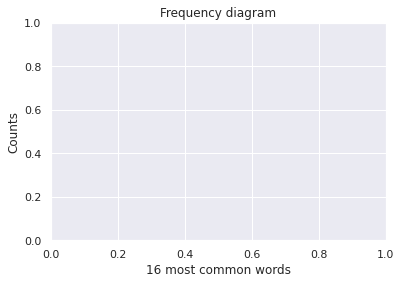

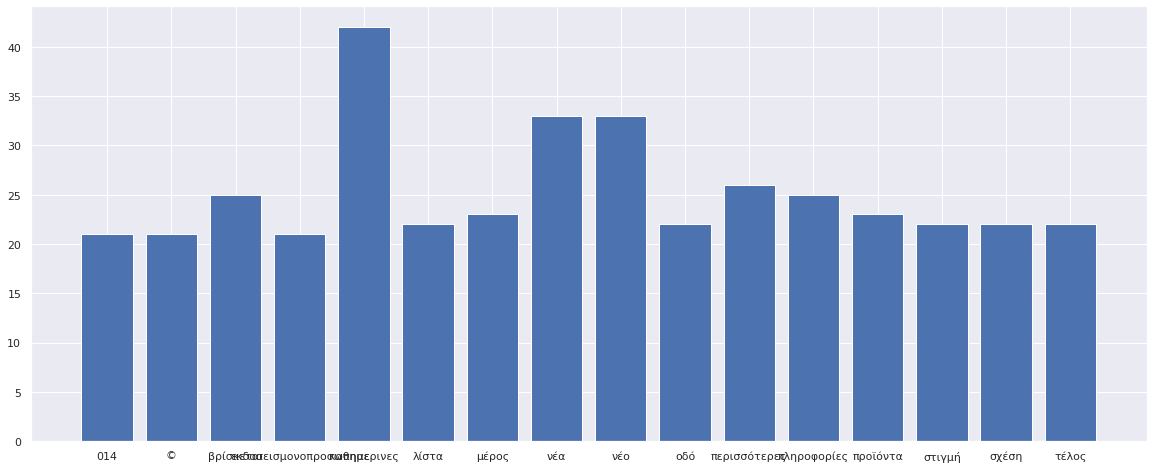

None


In [558]:
from collections import Counter

most_frequent = Counter(tokens_without_sw).most_common(16)
print(most_frequent) 

def plot_most_frequent(frequent):
    frequent = sorted(frequent, key=lambda pair: pair[0], reverse=False)
    x = list(map(lambda h: h[0], frequent))
    y = list(map(lambda h: h[1], frequent)) 
    
    plt.title("Frequency diagram")
    plt.xlabel("16 most common words")
    plt.ylabel("Counts")
    plt.figure(figsize=(20,8))

    plt.bar(x, y)
    plt.show()
    
print(plot_most_frequent(most_frequent[:16]))

In [559]:
#analysi sunaisthimatos
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [560]:
kathimerini = '/content/kathimerini.csv'
kathimerini = pd.read_csv(kathimerini)

In [561]:
kathimerini

headline  ... day
0   Βέλγιο: Θετική εισήγηση για τον εμβολιασμό κατ...  ...   6
1   Εμβολιασμός-COVID19: Το κουβανικό Αμπντάλα 92,...  ...  22
2   Ψηφιακό πιστοποιητικό Covid19: Αναλυτικός οδηγ...  ...  28
3   Ψηφιακό πιστοποιητικό Covid19: Η διαδικασία έκ...  ...  28
4   Βασίλης Σεβαστής: Πέθανε από COVID19 ο παλαιός...  ...   8
5   Εφαρμογή με ελληνικές ρίζες στη μάχη κατά της ...  ...  27
6   Λέρος: Ξέχασαν στο πλοίο δείγματα για Covid19 ...  ...   2
7   Στο «κόκκινο» η Ευρώπη- Ξεπέρασε σε νέα κρούσμ...  ...  14
8   Ευρώπη- Covid19: Στο «στόχαστρο» και πάλι οι μ...  ...   6
9   Το αποτύπωμα του Covid19 στις εισηγμένες του Χ.Α.  ...   1
10  Covid19: Το χρονικό της μάχης του πλανήτη κατά...  ...  30
11  Lenovo- Focus Bari: Οι ελληνικές επιχειρήσεις ...  ...  24
12  O Covid19 στέλνει τους επενδυτές στο καταφύγιο...  ...  24
13  Εργασία: Πόσες ώρες «έφαγε» ο Covid19 το β’ τρ...  ...  18
14  OHE: Το πρόγραμμα του ΠΟΥ για τον Covid19 χρει...  ...  10
15  Covid19: Γιατί ο εθνικισμός του εμβολίου κερδί...  ...  10
16      Ο Covid19 και ο κίνδυνος επισιτιστικής κρίσης  ...   9
17  Covid19: Γιατί το εμβόλιο δεν είναι «πανάκεια»...  ...   9
18  ΗΠΑ – Covid19: Η Φλόριντα ξεπέρασε σε κρούσματ...  ...  26
19  Θ. Δημόπουλος-COVID19: Για κάθε μέρα σε μηχανι...  ...  12
20  «East Med: Η τριμερής συνεργασία (Ελλάδα-Ισραή...  ...   2
21  Προς ένα μετά-COVID19 νέο αναπτυξιακό μοντέλο:...  ...  19
22  «Digital Clinic» και «COVID19 Digital Clinic»:...  ...  12

[23 rows x 8 columns]

In [562]:
kathimerini['releasedate'] =  pd.to_datetime(kathimerini['releasedate'] )

In [563]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  ...  Joy  Sadness  Surprise  Trust
0            αφεση       1.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
1  ενορκη βεβαιωση       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
2          εχοντας       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
3              εχω       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
4             οριο       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 11 columns]

In [564]:
emolex_df.tail()

word  Positive  Negative  Anger  ...  Joy  Sadness  Surprise  Trust
13166     ουρλιασμα       0.0       1.0    1.0  ...  0.0      0.0       1.0    0.0
13167  κροκος αυγου       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13168      νεοτερος       1.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13169       ζεφυρος       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13170          ζουμ       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 11 columns]

In [565]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [566]:
emolex_df.tail()

index          word  Positive  Negative  ...  Joy  Sadness  Surprise  Trust
13156  13166     ουρλιασμα       0.0       1.0  ...  0.0      0.0       1.0    0.0
13157  13167  κροκος αυγου       0.0       0.0  ...  0.0      0.0       0.0    0.0
13158  13168      νεοτερος       1.0       0.0  ...  0.0      0.0       0.0    0.0
13159  13169       ζεφυρος       0.0       0.0  ...  0.0      0.0       0.0    0.0
13160  13170          ζουμ       0.0       0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 12 columns]

In [567]:
kathimerini

headline  ... day
0   Βέλγιο: Θετική εισήγηση για τον εμβολιασμό κατ...  ...   6
1   Εμβολιασμός-COVID19: Το κουβανικό Αμπντάλα 92,...  ...  22
2   Ψηφιακό πιστοποιητικό Covid19: Αναλυτικός οδηγ...  ...  28
3   Ψηφιακό πιστοποιητικό Covid19: Η διαδικασία έκ...  ...  28
4   Βασίλης Σεβαστής: Πέθανε από COVID19 ο παλαιός...  ...   8
5   Εφαρμογή με ελληνικές ρίζες στη μάχη κατά της ...  ...  27
6   Λέρος: Ξέχασαν στο πλοίο δείγματα για Covid19 ...  ...   2
7   Στο «κόκκινο» η Ευρώπη- Ξεπέρασε σε νέα κρούσμ...  ...  14
8   Ευρώπη- Covid19: Στο «στόχαστρο» και πάλι οι μ...  ...   6
9   Το αποτύπωμα του Covid19 στις εισηγμένες του Χ.Α.  ...   1
10  Covid19: Το χρονικό της μάχης του πλανήτη κατά...  ...  30
11  Lenovo- Focus Bari: Οι ελληνικές επιχειρήσεις ...  ...  24
12  O Covid19 στέλνει τους επενδυτές στο καταφύγιο...  ...  24
13  Εργασία: Πόσες ώρες «έφαγε» ο Covid19 το β’ τρ...  ...  18
14  OHE: Το πρόγραμμα του ΠΟΥ για τον Covid19 χρει...  ...  10
15  Covid19: Γιατί ο εθνικισμός του εμβολίου κερδί...  ...  10
16      Ο Covid19 και ο κίνδυνος επισιτιστικής κρίσης  ...   9
17  Covid19: Γιατί το εμβόλιο δεν είναι «πανάκεια»...  ...   9
18  ΗΠΑ – Covid19: Η Φλόριντα ξεπέρασε σε κρούσματ...  ...  26
19  Θ. Δημόπουλος-COVID19: Για κάθε μέρα σε μηχανι...  ...  12
20  «East Med: Η τριμερής συνεργασία (Ελλάδα-Ισραή...  ...   2
21  Προς ένα μετά-COVID19 νέο αναπτυξιακό μοντέλο:...  ...  19
22  «Digital Clinic» και «COVID19 Digital Clinic»:...  ...  12

[23 rows x 8 columns]

In [568]:
len(kathimerini)

23

In [569]:
emolex_df['word'].head(10)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
3                εχω
4               οριο
5              ορμος
6               υδρα
7       αγια τραπεζα
8               αμην
9             απατσι
Name: word, dtype: object

In [570]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [571]:
kathimerini['anger'] = wordcount_df[angry_words].sum(axis=1)

kathimerini['positivity'] = wordcount_df[positive_words].sum(axis=1)


kathimerini['joy'] = wordcount_df[joy_words].sum(axis=1)


kathimerini['disgust'] = wordcount_df[disgust_words].sum(axis=1)



kathimerini['surprise'] = wordcount_df[surprise_words].sum(axis=1)

kathimerini['trust'] = wordcount_df[trust_words].sum(axis=1)


kathimerini['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


kathimerini['sadness'] = wordcount_df[sadness_words].sum(axis=1)

kathimerini['negative'] = wordcount_df[negative_words].sum(axis=1)

kathimerini['fear'] = wordcount_df[fear_words].sum(axis=1)

In [572]:
kathimerini.set_index('releasedate' , inplace=True)

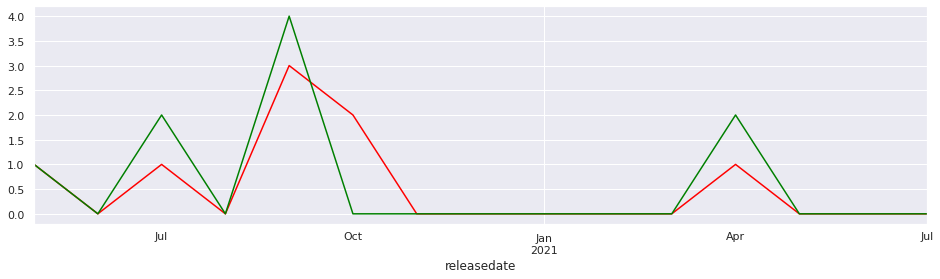

In [573]:
ax = kathimerini['anger'].resample('M').sum().plot(figsize=(16,4), color = 'red')
kathimerini['joy'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')

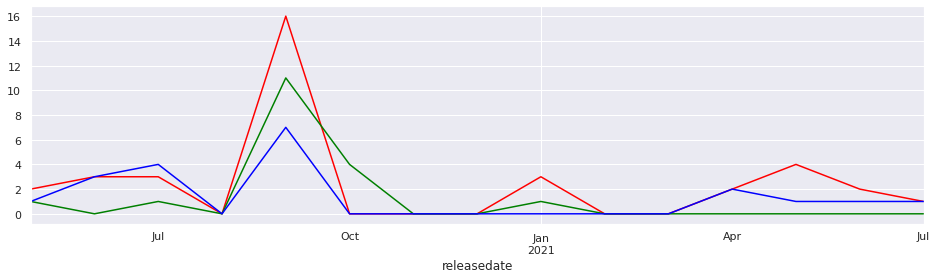

In [574]:
ax = kathimerini['positivity'].resample('M').sum().plot(figsize=(16,4), color = 'red')
kathimerini['negative'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')
kathimerini['trust'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

In [575]:
import seaborn as sns
import matplotlib.pyplot as plt


In [576]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [577]:
count_vector = cv.fit_transform(kathimerini['summary'])

In [578]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

000  10  11  12  146  15  17  ...  όσα  όσους  όσων  όταν  ότι  ύφεση  ώρα
0    0   0   0   1    0   1   0  ...    0      0     1     0    0      0    0
1    0   0   0   0    0   0   0  ...    0      0     0     0    0      0    0
2    0   0   0   0    0   0   0  ...    1      0     0     0    0      0    0
3    0   0   0   0    0   0   0  ...    0      0     0     0    0      0    0
4    0   0   0   0    0   0   0  ...    0      0     0     0    0      0    0

[5 rows x 525 columns]

In [579]:
cv = CountVectorizer(stop_words= final_stopwords, min_df=0.01, max_df=0.95)

In [580]:
count_vector = cv.fit_transform(kathimerini['summary'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [581]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

000  10  11  12  146  15  ...  ψηφιακού  ψηφιακό  ψηφιακών  ωρών  ύφεση  ώρα
0    0   0   0   1    0   1  ...         0        0         0     0      0    0
1    0   0   0   0    0   0  ...         0        0         0     0      0    0
2    0   0   0   0    0   0  ...         1        1         0     0      0    0
3    0   0   0   0    0   0  ...         0        0         0     0      0    0
4    0   0   0   0    0   0  ...         0        0         0     0      0    0

[5 rows x 434 columns]

In [582]:
from html import unescape
def my_tokenizer(doc):
            
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    return(lemmatized_tokens)

In [583]:
cv = CountVectorizer(stop_words= final_stopwords, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer) 

In [584]:
cv = CountVectorizer( stop_words= final_stopwords, max_features=20) 

In [585]:
results.sum(axis =0).sort_values(ascending = False)

covid        10
19            6
covid19       5
πανδημίας     4
δεύτερο       4
             ..
μοντέλα       1
μπαίνουν      1
μόλυνε        1
νέο           1
000           1
Length: 434, dtype: int64

In [586]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head(40)

covid           10
19               6
covid19          5
πανδημίας        4
δεύτερο          4
πτώση            3
συνεργασία       3
κρουσμάτων       3
έρευνα           2
εμβολιασμό       2
εμβολίου         2
εμφάνιση         2
υγείας           2
ελλάδα           2
εννέα            2
εκατομμύρια      2
τρίμηνο          2
ώρα              2
πόσο             2
digital          2
κύμα             2
μέτρα            2
αμερική          2
αναγκαία         2
μετάβαση         2
δημιούργησε      2
ανθρώπους        2
νέα              2
παρουσία         2
έτους            2
εικόνα           2
ευρώπης          2
επιχειρήσεις     2
ψηφιακής         2
amcham           2
εφήβων           2
ευρωπαϊκού       2
εργασίας         2
ψηφιακού         2
χώρα             2
dtype: int64

In [587]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [588]:
tfidf_vectorizer = TfidfVectorizer(stop_words= final_stopwords, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(kathimerini['summary'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [589]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

000   10   11        12  146  ...   ψηφιακό  ψηφιακών  ωρών  ύφεση  ώρα
0  0.0  0.0  0.0  0.206369  0.0  ...  0.000000       0.0   0.0    0.0  0.0
1  0.0  0.0  0.0  0.000000  0.0  ...  0.000000       0.0   0.0    0.0  0.0
2  0.0  0.0  0.0  0.000000  0.0  ...  0.181723       0.0   0.0    0.0  0.0
3  0.0  0.0  0.0  0.000000  0.0  ...  0.000000       0.0   0.0    0.0  0.0
4  0.0  0.0  0.0  0.000000  0.0  ...  0.000000       0.0   0.0    0.0  0.0

[5 rows x 434 columns]

In [590]:
from sklearn.metrics.pairwise import cosine_similarity


print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.         0.03379902 0.02172302 0.01550955 0.         0.
  0.         0.         0.         0.         0.0246314  0.
  0.0260745  0.         0.06923359 0.         0.         0.
  0.0382463  0.01528562 0.         0.         0.        ]]


In [591]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))

cosine scores ==>  [[1.         0.03379902 0.02172302 0.01550955 0.         0.
  0.         0.         0.         0.         0.0246314  0.
  0.0260745  0.         0.06923359 0.         0.         0.
  0.0382463  0.01528562 0.         0.         0.        ]
 [0.03379902 1.         0.02463242 0.01758677 0.         0.03846865
  0.         0.         0.         0.         0.02793031 0.
  0.02956669 0.         0.03710712 0.         0.         0.
  0.04336868 0.01733285 0.         0.         0.04961762]
 [0.02172302 0.02463242 1.         0.02731453 0.         0.
  0.         0.         0.         0.         0.01795114 0.05339694
  0.01900286 0.03208536 0.02384918 0.         0.         0.
  0.02787356 0.02692016 0.02143763 0.         0.        ]
 [0.01550955 0.01758677 0.02731453 1.         0.         0.
  0.         0.         0.         0.         0.01281655 0.03812373
  0.01356744 0.         0.01702756 0.         0.         0.
  0.01990084 0.01922014 0.03061158 0.         0.        ]
 [0. 

In [592]:
parr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

array([[1.        , 0.03379902, 0.02172302, 0.01550955, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.0246314 , 0.        , 0.0260745 , 0.        , 0.06923359,
        0.        , 0.        , 0.        , 0.0382463 , 0.01528562,
        0.        , 0.        , 0.        ],
       [0.03379902, 1.        , 0.02463242, 0.01758677, 0.        ,
        0.03846865, 0.        , 0.        , 0.        , 0.        ,
        0.02793031, 0.        , 0.02956669, 0.        , 0.03710712,
        0.        , 0.        , 0.        , 0.04336868, 0.01733285,
        0.        , 0.        , 0.04961762],
       [0.02172302, 0.02463242, 1.        , 0.02731453, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01795114, 0.05339694, 0.01900286, 0.03208536, 0.02384918,
        0.        , 0.        , 0.        , 0.02787356, 0.02692016,
        0.02143763, 0.        , 0.        ],
       [0.01550955, 0.01758677, 0.02731453, 1.   

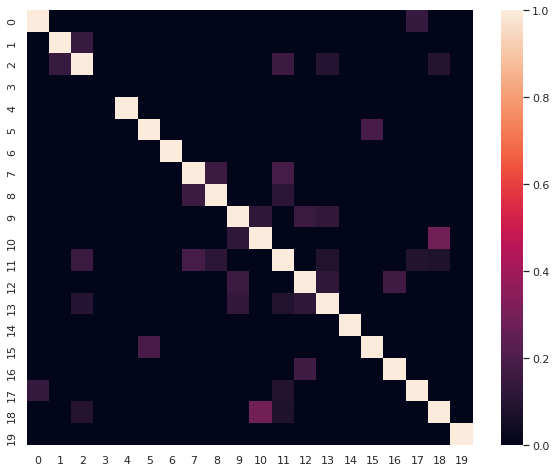

In [593]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

plt.figure(figsize= (10,8))
ax = sns.heatmap(cosine_similarity(wordcount_df.head(20), wordcount_df.head(20)))
cosine_similarity(X=tfidf_matrix_train, Y=None, dense_output=True)